In [1]:
# ------ >>>>> BINARY CLASSIFICATION FULL STACK <<<<< --------

# ------------- data analysis and wrangling-------------------
import pandas as pd
import numpy as np
import random as rnd
from pandas import DataFrame
import warnings
warnings.filterwarnings("ignore")
import shap
# ------------------------------------------------------------

# ------- import các tool visualization ----------------------
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# ------------------------------------------------------------

# ----- import các thuật toán machine learning----------------
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree
# ------------------------------------------------------------

# -------- import các thuật toán tính toán sai số ------------
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
# ------------------------------------------------------------

In [2]:
hotjar = pd.read_excel(r"C:\PYTHON LEARNING\DATA\hotjar.xlsx")
hotjar = pd.DataFrame(hotjar)
novaon = pd.read_excel(r"C:\PYTHON LEARNING\DATA\novaon.xlsx")
novaon = pd.DataFrame(novaon)

In [3]:
hotjar

,Google Click ID,Action Count,Page Count,Duration (seconds),Device,Browser,Operating System,hiệu quả
0,Cj0KCQiA_qD_BRDiARIsANjZ2LA74RpzDrgbsUPxVR_592...,9,1,235,Desktop,Safari,Mac,0
1,Cj0KCQiA_qD_BRDiARIsANjZ2LABq5u2tnGz6lXVXxu25G...,72,1,1194,Phone,Chrome,Android,1
2,Cj0KCQiA_qD_BRDiARIsANjZ2LAb-SIoqJ76wz3iGys8ob...,1,1,87,Desktop,Chrome,Windows,0
3,Cj0KCQiA_qD_BRDiARIsANjZ2LAcbgH034Voirk6nqY5F0...,64,1,511,Phone,Chrome,Android,1
4,Cj0KCQiA_qD_BRDiARIsANjZ2LAd1qfztAdpee3bja7-jd...,1,1,1138,Desktop,Chrome,Windows,0


In [4]:
novaon

,#,Địa chỉ IP,Từ khóa,Loại từ khóa,Vi phạm,Đang chặn,Thời điểm click,Google Click ID,Hệ điều hành,Trình duyệt,...,Nhà mạng,Thiết bị,VPN/Proxy,Trang đích,Thành phố,Quốc gia,Mạng hiển thị,Vị trí,Chiến dịch,Nhóm quảng cáo
0,1,42.118.27.104,tài khoản giao dịch chứng khoán,Đối sánh rộng,NaN,NaN,15:08:28 25/01/2021,CjwKCAiA9bmABhBbEiwASb35VyTqXOXflA9cAmQBAs49Di...,Android,Chrome,...,FPT Telecom Company,Mobile,NaN,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Hồ Chí Minh,VN,Google search,NaN,VCSC eKYC,NaN
1,2,2402:800:6234:52fc:cdf8:7940:ffbb:e1d,tài khoản giao dịch chứng khoán,Đối sánh rộng,NaN,NaN,15:08:14 25/01/2021,CjwKCAiA9bmABhBbEiwASb35VyDkPXiNMvDnXBeMPV2Xza...,Android,Chrome,...,Viettel Group,Mobile,NaN,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Bình Định,VN,Google search,NaN,VCSC eKYC,NaN


In [5]:
efficient_keyword = pd.merge(hotjar,novaon, how='left', on=['Google Click ID'])
efficient_keyword

,Google Click ID,Action Count,Page Count,Duration (seconds),Device,Browser,Operating System,hiệu quả,#,Địa chỉ IP,...,Nhà mạng,Thiết bị,VPN/Proxy,Trang đích,Thành phố,Quốc gia,Mạng hiển thị,Vị trí,Chiến dịch,Nhóm quảng cáo
0,Cj0KCQiA_qD_BRDiARIsANjZ2LA74RpzDrgbsUPxVR_592...,9,1,235,Desktop,Safari,Mac,0,2673.0,2402:800:6375:fc5d:9852:32eb:a4c6:a548,...,Viettel Group,Desktop,NaN,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Hồ Chí Minh,VN,Google search,NaN,VCSC adwords,1. VCSC Adwords
1,Cj0KCQiA_qD_BRDiARIsANjZ2LABq5u2tnGz6lXVXxu25G...,72,1,1194,Phone,Chrome,Android,1,2674.0,2001:ee0:4969:5290:f91f:a448:7e9a:c35f,...,VNPT,Mobile,NaN,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Nam Định,VN,Google search,NaN,VCSC adwords,1. VCSC Adwords
2,Cj0KCQiA_qD_BRDiARIsANjZ2LAb-SIoqJ76wz3iGys8ob...,1,1,87,Desktop,Chrome,Windows,0,2661.0,2402:800:6214:1a29:b124:2c4:a9a6:5de,...,Viettel Group,Desktop,NaN,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Lâm Đồng,VN,Google search,NaN,VCSC adwords,1. VCSC Adwords
3,Cj0KCQiA_qD_BRDiARIsANjZ2LAcbgH034Voirk6nqY5F0...,64,1,511,Phone,Chrome,Android,1,2688.0,2402:800:639d:dc36:846b:21ba:7bd1:5c8a,...,Viettel Group,Mobile,NaN,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Đồng Nai,VN,Google search,NaN,VCSC adwords,1. VCSC Adwords
4,Cj0KCQiA_qD_BRDiARIsANjZ2LAd1qfztAdpee3bja7-jd...,1,1,1138,Desktop,Chrome,Windows,0,2644.0,113.160.142.84,...,VNPT,Desktop,NaN,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Sơn La,VN,Google search,NaN,VCSC adwords,1. VCSC Adwords
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3172,EAIaIQobChMIzMGi2pmU7gIVhVVgCh3CKweKEAAYASAAEg...,2,1,464,Desktop,Chrome,Windows,0,1333.0,2402:800:61cf:c6bb:7d48:b455:c6a9:9b9e,...,Viettel Group,Desktop,NaN,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Vĩnh Phúc,VN,Google search,NaN,VCSC adwords,1. VCSC Adwords
3173,EAIaIQobChMIzN3izNTb7QIVlkNgCh2QpgYiEAAYBCAAEg...,1,1,38,Desktop,Chrome,Windows,0,3275.0,113.189.14.21,...,VNPT,Desktop,NaN,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Đắk Lắk,VN,Google search,NaN,VCSC adwords,1. VCSC Adwords
3174,EAIaIQobChMIzObV27GT7gIVBMWWCh39pwXVEAAYASAAEg...,1,1,84,Phone,Chrome,Android,0,1452.0,2402:800:6101:24bb:2d53:4648:ab91:3c3b,...,Viettel Group,Mobile,NaN,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Hải Dương,VN,Google search,NaN,VCSC adwords,1. VCSC Adwords
3175,EAIaIQobChMIzqec3oOA7gIVSrGWCh08RwFpEAAYAyAAEg...,13,1,49,Phone,Safari,Ios,0,2177.0,2001:ee0:49d5:a970:910b:c4ec:f5d1:31d,...,VNPT,Mobile,NaN,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Thái Bình,VN,Google search,NaN,VCSC adwords,1. VCSC Adwords


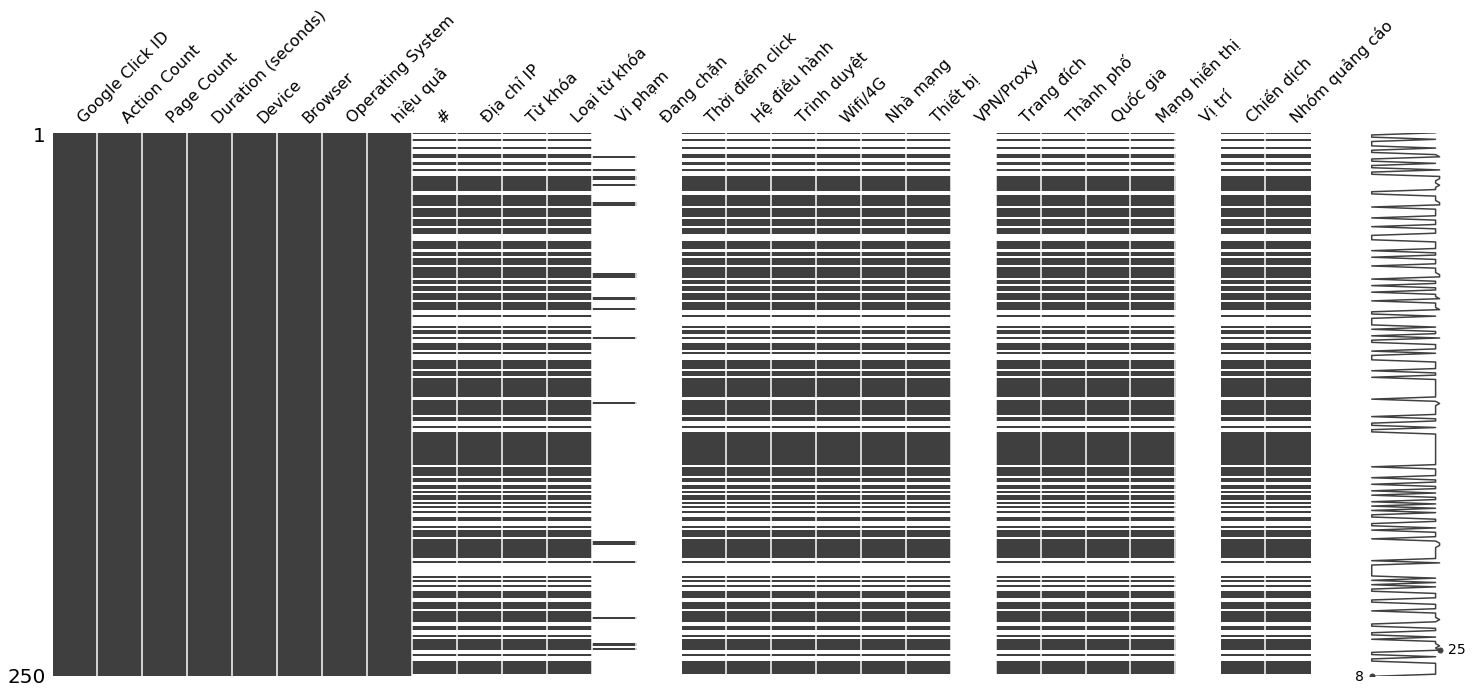

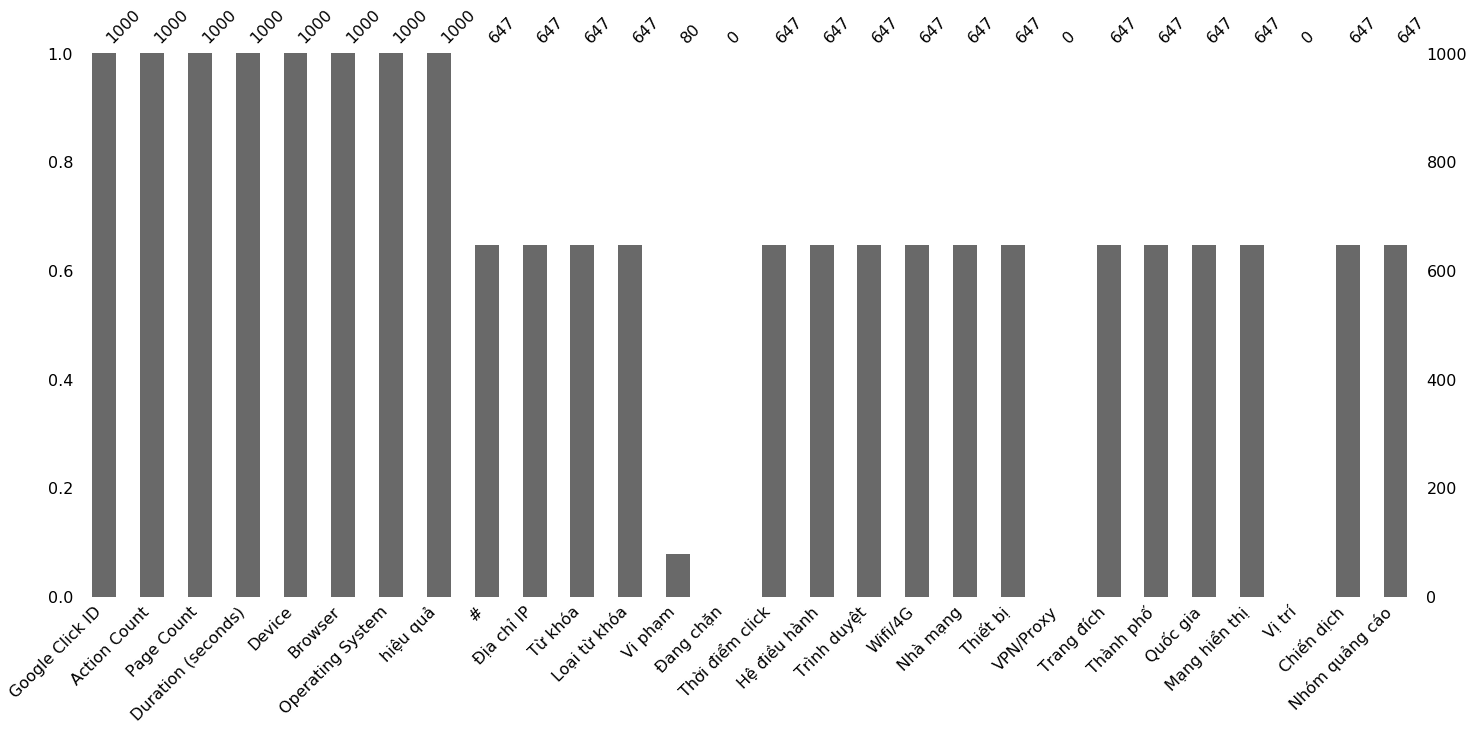

In [6]:
import missingno as msno
import numpy as np
collisions = efficient_keyword.replace("nan", np.nan)
msno.matrix(collisions.sample(250))
plt.show()
msno.bar(collisions.sample(1000))
plt.show()

In [7]:
efficient_keyword = efficient_keyword.drop(['Vi phạm','Đang chặn','VPN/Proxy','Vị trí'],axis = 1)
efficient_keyword = efficient_keyword.dropna()

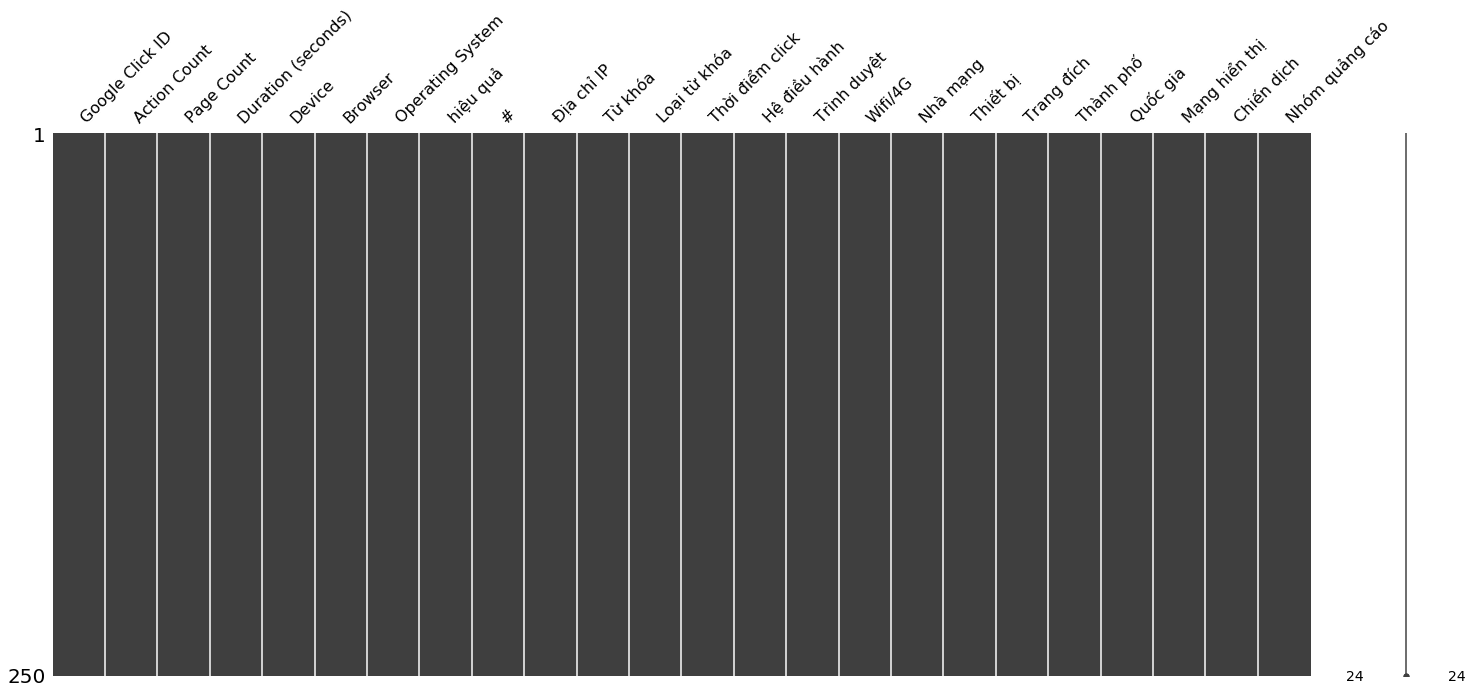

In [8]:
import missingno as msno
import numpy as np
collisions = efficient_keyword.replace("nan", np.nan)
msno.matrix(collisions.sample(250))
plt.show()

In [9]:
efficient_keyword

,Google Click ID,Action Count,Page Count,Duration (seconds),Device,Browser,Operating System,hiệu quả,#,Địa chỉ IP,...,Trình duyệt,Wifi/4G,Nhà mạng,Thiết bị,Trang đích,Thành phố,Quốc gia,Mạng hiển thị,Chiến dịch,Nhóm quảng cáo
0,Cj0KCQiA_qD_BRDiARIsANjZ2LA74RpzDrgbsUPxVR_592...,9,1,235,Desktop,Safari,Mac,0,2673.0,2402:800:6375:fc5d:9852:32eb:a4c6:a548,...,13.1.2 Safari,Cố định/Wifi,Viettel Group,Desktop,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Hồ Chí Minh,VN,Google search,VCSC adwords,1. VCSC Adwords
1,Cj0KCQiA_qD_BRDiARIsANjZ2LABq5u2tnGz6lXVXxu25G...,72,1,1194,Phone,Chrome,Android,1,2674.0,2001:ee0:4969:5290:f91f:a448:7e9a:c35f,...,Chrome,Cố định/Wifi,VNPT,Mobile,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Nam Định,VN,Google search,VCSC adwords,1. VCSC Adwords
2,Cj0KCQiA_qD_BRDiARIsANjZ2LAb-SIoqJ76wz3iGys8ob...,1,1,87,Desktop,Chrome,Windows,0,2661.0,2402:800:6214:1a29:b124:2c4:a9a6:5de,...,Chrome,Cellular,Viettel Group,Desktop,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Lâm Đồng,VN,Google search,VCSC adwords,1. VCSC Adwords
3,Cj0KCQiA_qD_BRDiARIsANjZ2LAcbgH034Voirk6nqY5F0...,64,1,511,Phone,Chrome,Android,1,2688.0,2402:800:639d:dc36:846b:21ba:7bd1:5c8a,...,Chrome,Cố định/Wifi,Viettel Group,Mobile,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Đồng Nai,VN,Google search,VCSC adwords,1. VCSC Adwords
4,Cj0KCQiA_qD_BRDiARIsANjZ2LAd1qfztAdpee3bja7-jd...,1,1,1138,Desktop,Chrome,Windows,0,2644.0,113.160.142.84,...,Chrome,Cố định/Wifi,VNPT,Desktop,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Sơn La,VN,Google search,VCSC adwords,1. VCSC Adwords
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3171,EAIaIQobChMIzL6uyvv_7QIVGFZgCh2rmQnsEAAYASAAEg...,4,1,71,Desktop,Chrome,Windows,0,2183.0,2001:ee0:46ec:f770:95e:8c5e:7c9c:22eb,...,Chrome,Cố định/Wifi,VNPT,Desktop,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Thái Nguyên,VN,Google search,VCSC adwords,1. VCSC Adwords
3172,EAIaIQobChMIzMGi2pmU7gIVhVVgCh3CKweKEAAYASAAEg...,2,1,464,Desktop,Chrome,Windows,0,1333.0,2402:800:61cf:c6bb:7d48:b455:c6a9:9b9e,...,Chrome,Cố định/Wifi,Viettel Group,Desktop,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Vĩnh Phúc,VN,Google search,VCSC adwords,1. VCSC Adwords
3173,EAIaIQobChMIzN3izNTb7QIVlkNgCh2QpgYiEAAYBCAAEg...,1,1,38,Desktop,Chrome,Windows,0,3275.0,113.189.14.21,...,Chrome,Cố định/Wifi,VNPT,Desktop,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Đắk Lắk,VN,Google search,VCSC adwords,1. VCSC Adwords
3174,EAIaIQobChMIzObV27GT7gIVBMWWCh39pwXVEAAYASAAEg...,1,1,84,Phone,Chrome,Android,0,1452.0,2402:800:6101:24bb:2d53:4648:ab91:3c3b,...,Android Browser,Cố định/Wifi,Viettel Group,Mobile,"<a href=""https://invest.vcsc.com.vn/mo-tai-kho...",Hải Dương,VN,Google search,VCSC adwords,1. VCSC Adwords


Target looks like classification
Linear Discriminant Analysis training set score: 0.820


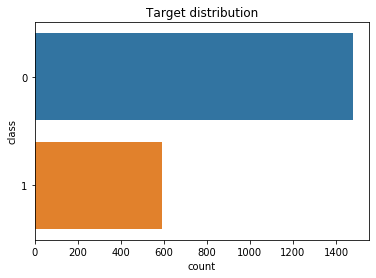

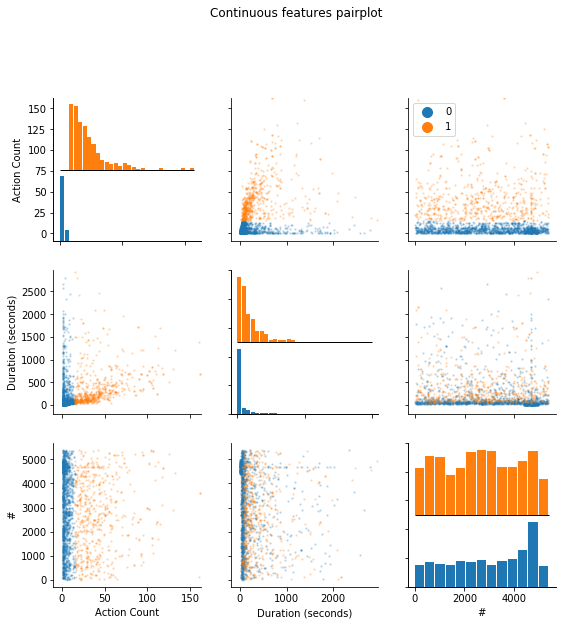

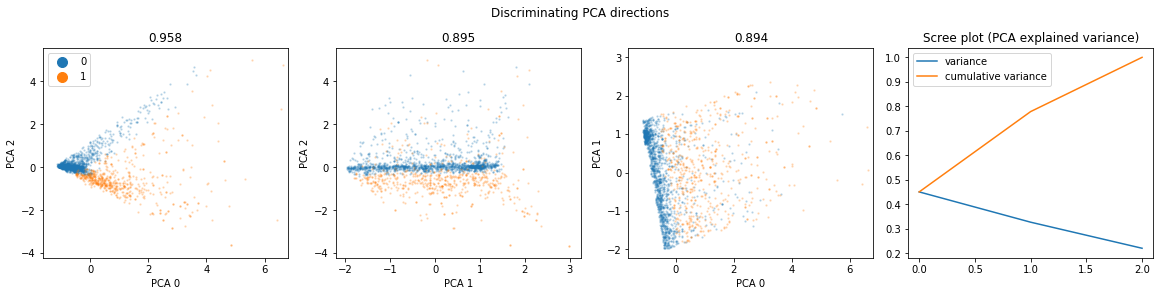

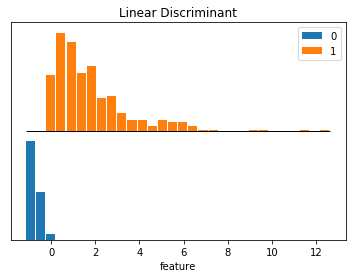

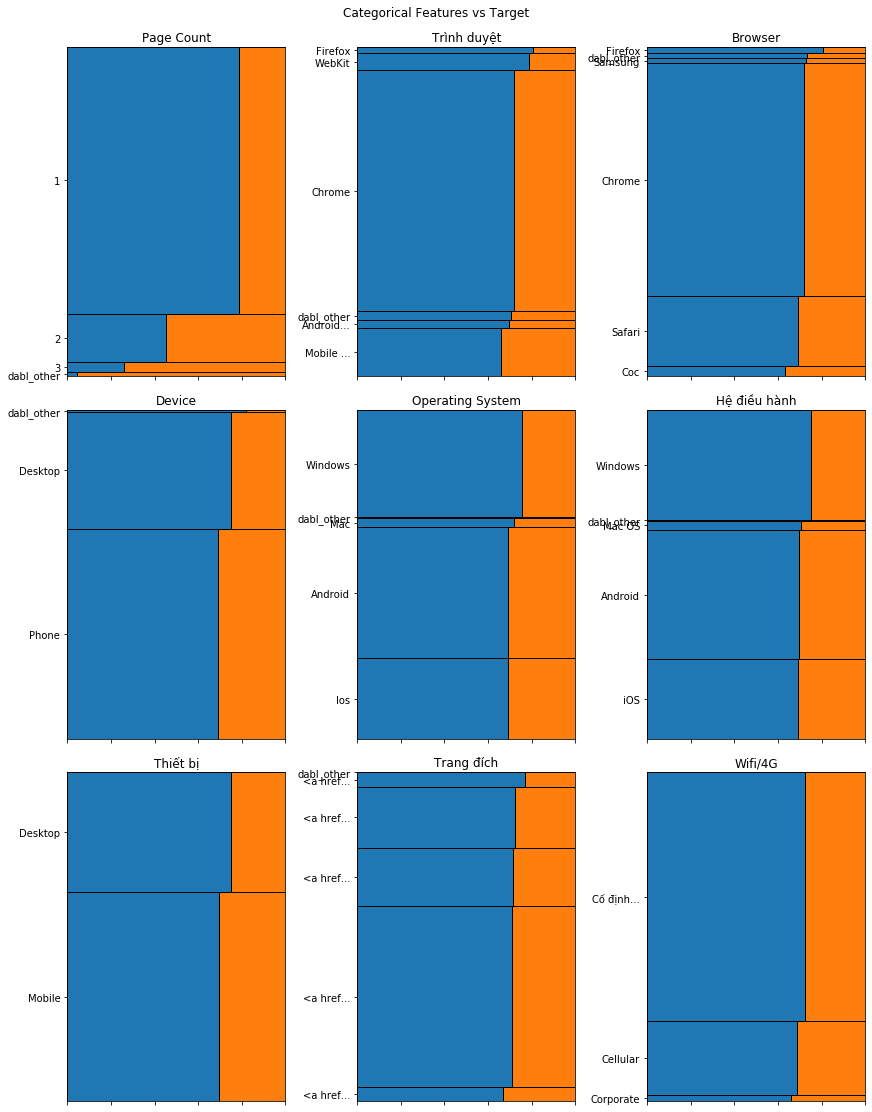

In [10]:
target = 'hiệu quả'
import dabl
from dabl import plot
from dabl.datasets import load_ames
plot(efficient_keyword, target)
plt.show()

In [11]:
keyword_efficient = []
keyword_efficient = pd.DataFrame(keyword_efficient)
keyword_efficient['Từ khoán'] = efficient_keyword['Từ khóa']
keyword_efficient['hiệu quả'] = efficient_keyword['hiệu quả']

In [12]:
df = keyword_efficient
df.drop(df.loc[df['hiệu quả']==0].index, inplace=True)
a = df.groupby('Từ khoán').sum().sort_values('hiệu quả', ascending=False)
a.reset_index()
a

,hiệu quả
Từ khoán,
đăng ký đầu tư chứng khoán,128
+mở +tài +khoản +chứng +khoán,71
lap tai khoan chung khoan,70
tao tai khoan chung khoan,53
hướng dẫn đăng ký tài khoản chứng khoán,35
đăng ký tài khoản giao dịch chứng khoán,27
hướng dẫn mở tài khoản chứng khoán vietcombank,18
cách đăng ký chứng khoán,17
+mở +tài +khoản +chứng +khoán +online,14


In [13]:
keyword_efficient = []
keyword_efficient = pd.DataFrame(keyword_efficient)
keyword_efficient['Từ khoán'] = efficient_keyword['Từ khóa']
keyword_efficient['hiệu quả'] = efficient_keyword['hiệu quả']

In [14]:
df1 = keyword_efficient
df1.drop(df.loc[df['hiệu quả']==1].index, inplace=True)
b = df1.groupby('Từ khoán').count().sort_values('hiệu quả', ascending=False)
b.reset_index()
b

,hiệu quả
Từ khoán,
+mở +tài +khoản +chứng +khoán,247
đăng ký đầu tư chứng khoán,246
lap tai khoan chung khoan,199
tao tai khoan chung khoan,148
hướng dẫn đăng ký tài khoản chứng khoán,72
hướng dẫn mở tài khoản chứng khoán vietcombank,66
cách tạo tài khoản chơi chứng khoán,43
đăng ký tài khoản giao dịch chứng khoán,41
mở tài khoản tcbs,33


In [16]:
c = pd.merge(a,b, how='left', on=['Từ khoán'])
c.head(10)

,hiệu quả_x,hiệu quả_y
Từ khoán,,
đăng ký đầu tư chứng khoán,128,246.0
+mở +tài +khoản +chứng +khoán,71,247.0
lap tai khoan chung khoan,70,199.0
tao tai khoan chung khoan,53,148.0
hướng dẫn đăng ký tài khoản chứng khoán,35,72.0
đăng ký tài khoản giao dịch chứng khoán,27,41.0
hướng dẫn mở tài khoản chứng khoán vietcombank,18,66.0
cách đăng ký chứng khoán,17,25.0
+mở +tài +khoản +chứng +khoán +online,14,19.0
